# Regression models 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

df = pd.read_excel('session01/datasets/Canada.xlsx',
                  sheet_name='Canada by Citizenship',
                  skiprows = range(20),
                  skipfooter = 2,
                  engine = 'openpyxl')

df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape #ver la forma del archivo

(1013, 51)

In [3]:
years = list(map(str,range(1980,2014)))
#years

In [4]:
#cambiar los datafreame a que sean string
df.columns = list(map(str,df.columns))

In [5]:
df_t = pd.DataFrame(df[years].sum(axis=0))
df_t

,0
1980,286274.0
1981,257282.0
1982,242350.0
1983,178370.0
1984,176544.0
1985,168692.0
1986,198702.0
1987,304150.0
1988,323170.0
1989,383100.0


In [6]:
df_t.index = map(float,df_t.index)
df_t.reset_index(inplace=True)
df_t.head(2)

,index,0
0,1980.0,286274.0
1,1981.0,257282.0


In [7]:
df_t.columns =['year','total']
df_t.tail(2)

,year,total
32,2012.0,515806.0
33,2013.0,518042.0


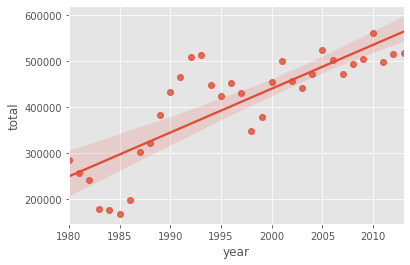

In [8]:
reg_plot = sns.regplot(x='year',
                      y='total',
                      data = df_t)

#linea de regresion

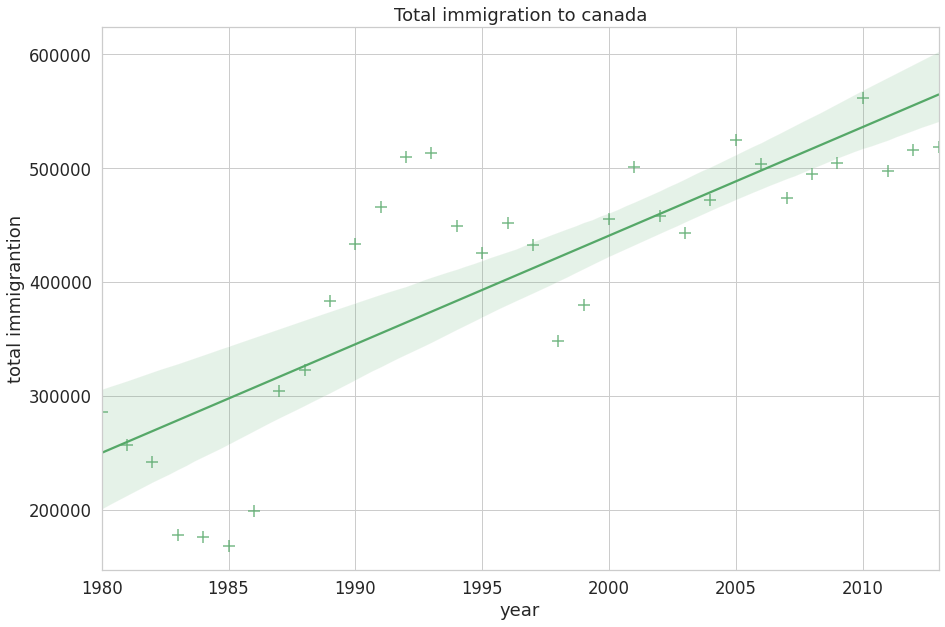

In [9]:
plt.figure(figsize=(15,10)) #tamaño de la figura
sns.set(font_scale=1.5) #tamaño letras
sns.set_style('whitegrid') #cambiar el estilo 
reg_plot = sns.regplot(x='year',
                      y='total',
                      data = df_t,
                      color = 'g',
                      marker = '+',
                      scatter_kws={'s':150})

reg_plot.set(xlabel='year',
             ylabel='total immigrantion')
reg_plot.set_title('Total immigration to canada')

plt.show()

# Correlacion
#regresion simple


In [10]:
df = pd.read_csv('session01/datasets/headbrain.csv')
df.head(2)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297


In [11]:
a = df['Head Size(cm^3)']
b = df['Brain Weight(grams)']


In [12]:
np.corrcoef(a,b) #arriba de 0.7 si hay correlacion, pero en este caso no es tan fuerte

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

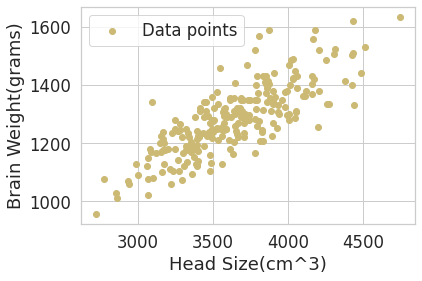

In [13]:
plt.scatter(a,b,
           c='y',
           label='Data points')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [14]:
import statsmodels.api as sm 

model = sm.OLS.from_formula('a~b', #b = b0 + b1*a
                           data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           5.96e-54
Time:                        00:44:19   Log-Likelihood:                -1613.4
No. Observations:                 237   AIC:                             3231.
Df Residuals:                     235   BIC:                             3238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.6101    153.215      3.398      0.001     218.759     822.461
b              2.4269      0.119     20.409      0.000       2.193       2.661
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.321
Skew:                           0.207   Prob(JB):                        0.313
Kurtosis:                       3.252   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [16]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = pd.DataFrame(df['Head Size(cm^3)'])
Y = pd.DataFrame(df['Brain Weight(grams)'])

model_lm = lm.fit(X,Y)
model_lm

LinearRegression()

In [17]:
model_lm.intercept_

array([325.57342105])

In [18]:
model_lm.coef_

array([[0.26342934]])

In [19]:
model_lm.score(X,Y)

0.639311719957

In [20]:
brain_weight = pd.DataFrame([200]) 
predict_headsize = model_lm.predict(brain_weight)
predict_headsize

array([[378.25928895]])

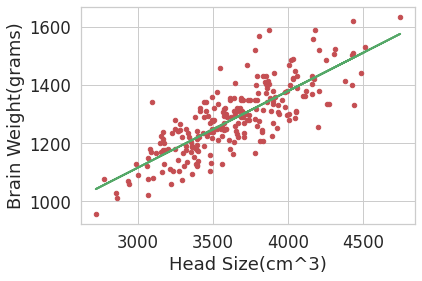

In [21]:
df.plot(kind='scatter',
       x = 'Head Size(cm^3)',
       y = 'Brain Weight(grams)',
       color = 'r')

plt.plot(X,
        model_lm.predict(X),
        linewidth=2,
        color='g')

plt.show()

In [22]:
#Regresion Multiple

In [23]:
df = pd.read_csv('session01/datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [24]:
vars=['BPXSY1','RIDAGEYR','RIAGENDR','RIDRETH1','DMDEDUC2','BMXBMI','SMQ020']
df = df[vars]
df.head(10)

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
5,116.0,72,2,1,2.0,28.6,2
6,110.0,22,1,4,4.0,28.0,1
7,120.0,32,2,1,4.0,28.2,2
8,NaN,18,1,5,NaN,26.2,2
9,178.0,56,1,4,3.0,33.6,2


In [25]:
df=df[vars].dropna()
df.head(10)

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
5,116.0,72,2,1,2.0,28.6,2
6,110.0,22,1,4,4.0,28.0,1
7,120.0,32,2,1,4.0,28.2,2
9,178.0,56,1,4,3.0,33.6,2
10,144.0,46,1,3,5.0,27.6,1


In [26]:
df[vars].corr()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
BPXSY1,1.000000,0.455142,-0.097076,-0.010871,-0.146381,0.118100,-0.083701
RIDAGEYR,0.455142,1.000000,-0.021398,-0.042591,-0.140524,0.023089,-0.115328
RIAGENDR,-0.097076,-0.021398,1.000000,-0.025863,0.029587,0.080463,0.186230
RIDRETH1,-0.010871,-0.042591,-0.025863,1.000000,0.305590,-0.156051,0.006584
DMDEDUC2,-0.146381,-0.140524,0.029587,0.305590,1.000000,-0.052670,0.086895
BMXBMI,0.118100,0.023089,0.080463,-0.156051,-0.052670,1.000000,-0.015199
SMQ020,-0.083701,-0.115328,0.186230,0.006584,0.086895,-0.015199,1.000000


In [29]:
model = sm.OLS.from_formula('BPXSY1~RIDAGEYR+RIAGENDR', #bpxsy1 = b0 + b1*RIDAGEYR + b2*RIAGENDR
                           data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          1.87e-268
Time:                        00:46:06   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.0949      0.984    108.790      0.000     105.165     109.025
RIDAGEYR       0.4739      0.013     36.518      0.000       0.448       0.499
RIAGENDR      -3.2322      0.459     -7.040      0.000      -4.132      -2.332
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""